# Eigenface Algorithm

In [1]:
#import required Libraries
import warnings
warnings.filterwarnings('ignore')
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [2]:
#set the path of training and testing image 
training_data_folder_path = 'dataset/training-data'
test_data_folder_path = 'dataset/test-data'

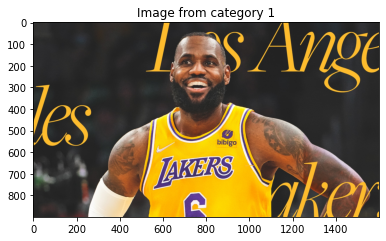

In [3]:
# read a sample training image
random_image = cv2.imread('Dataset/training-data/10/LeBron_James_5.jpg')
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('Image from category 1')# change category name accordingly
# show a sample training image
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# set the path of harcascade pretrained model for face detection
haarcascade_frontalface = 'opencv_xml_files/ haarcascade_frontalface.xml'

In [5]:
# define a function to detect faces of training images
def detect_face(input_img):
    
    # convert RGB image into gray scale image
    image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    
    # load pretrained haarcascade model for face detection
    face_cascade = cv2.CascadeClassifier('opencv_xml_files/haarcascade_frontalface.xml')
 
    # detect face of input image
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5);
    
    # check if face is detected
    if (len(faces) == 0):
        return -1, -1
    
    # determine the coordinates of bounding box of detect face
    (x, y, w, h) = faces[0]
    
    # return the face and bounding box or rectangle
    return image[y:y+w, x:x+h], faces[0]

In [6]:
# define a function for training preparation
def prepare_training_data(training_data_folder_path):
    
    # define two empty lists to store the detected faces and thier lables
    detected_faces = []
    face_labels = []
    
    # access the list of folders or directories of training images inside the training images folder
    traning_image_dirs = os.listdir(training_data_folder_path)
    
    # iterate through the list of training folder
    for dir_name in traning_image_dirs:
        
        # set the label or category of images, actually folder names are the labels of images 
        label = int(dir_name)
        
        # set the path of the each folder of training images
        training_image_path = training_data_folder_path + "/" + dir_name
        
        # get the list of names of training images
        training_images_names = os.listdir(training_image_path)
        
        # iterate through the list of names of training images
        for image_name in training_images_names:
            
            # get the path of each image
            image_path = training_image_path  + "/" + image_name
            
            # read each train image
            image = cv2.imread(image_path)
            
            # detect the face of each image
            face, rect = detect_face(image)
            
            # resized the each detected face image because eigenface algorithm accept the same size of all images
            if face is not -1:
                resized_face = cv2.resize(face, (121,121), interpolation = cv2.INTER_AREA)
                
                # store or append the detected faces and labels into above two lists
                detected_faces.append(resized_face)
                face_labels.append(label)

    # return the detect faces and their labels
    return detected_faces, face_labels

In [7]:
# detect face images and their label
detected_faces, face_labels = prepare_training_data("dataset/training-data")

In [8]:
# print the total number of trainig images and labels or categories
print("Total faces: ", len(detected_faces))
print("Total labels: ", len(face_labels))

Total faces:  229
Total labels:  229


In [9]:
# OpenCV is equipped with face recognizer modules.
# So, we use the Eigenfaces recognizer module from OpenCV
eigenfaces_recognizer = cv2.face.EigenFaceRecognizer_create()

In [10]:
# Now train the face recognizer model.
# but convert the labels into a Numpy array before passing it into the recognizer
# OpenCV expects labels as Numpy array
eigenfaces_recognizer.train(detected_faces, np.array(face_labels))

In [11]:
# Define the draw_rectangle function which will help us to draw rectangle around predicated face by the above model.
def draw_rectangle(test_image, rect):
    
    # coordinates of rectangle
    (x, y, w, h) = rect
    
    # draw rectangle on predicted image
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# define the write_text function which will help us to write label of predicted face image by the model
def draw_text(test_image, label_text, x, y):
    
    # write predicted label on face image
    cv2.putText(test_image, label_text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [12]:
# define a predict function
def predict(test_image):
    
    # detect face and rectangle by calling detect_face fucntion
    detected_face, rect = detect_face(test_image)
    
    # resize deteced face by 121x121
    resized_test_image = cv2.resize(detected_face, (121,121), interpolation = cv2.INTER_AREA)
    
    # get the predicted label
    label= eigenfaces_recognizer.predict(resized_test_image)
    label_text = tags[label[0]]
    
    # use the draw_rectangle function to draw a green rectangular box around the face using the four
    # coodinates obtained during face detection
    draw_rectangle(test_image, rect)
    
    # call the draw)_text function to write the predicated category of the image.
    draw_text(test_image, label_text, rect[0], rect[1]-5)
    
    return test_image, label_text

In [13]:
# actual labels of image
tags = ['Junichiro Koizumi', 'Alvaro Uribe', 'George Robertson', 'George W Bush', 'Atal Bihari Vajpayee', 'Amelia Vega', 'Ana Guevara', 'Taylor Swift', 'Barack Obama', 'Michael Jackson', 'LeBron James', 'Lisa', 'Lee Ji Eun', 'Bae Suzy', 'Rowan Atkinson', 'Ed Sheeran', 'Ariana Grande', 'Doja Cat', 'Jay Chou', 'Michael Phelps']

In [14]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/9/Michael_Jackson_101.jpg")

In [15]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

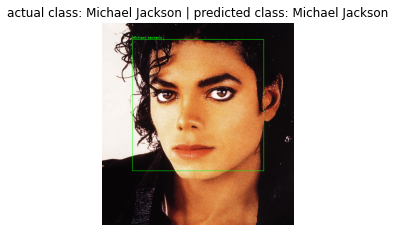

In [16]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[9]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/10/LeBron_James_21.jpg")

In [18]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

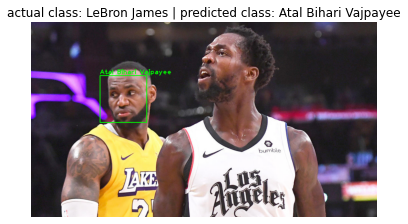

In [19]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[10]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/11/Lisa_100.jpg")

In [21]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

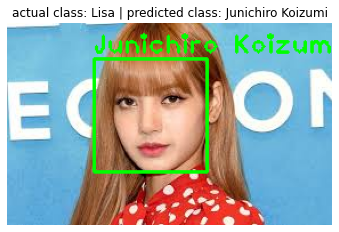

In [22]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[11]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/12/Lee_Ji_Eun_101.jpg")

In [24]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

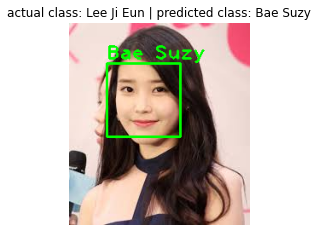

In [25]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[12]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/13/Bae_Suzy_100.jpg")

In [27]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

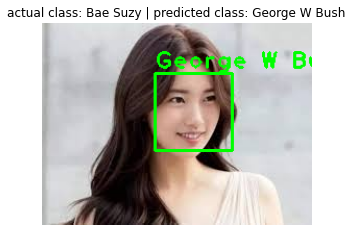

In [28]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[13]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/14/Rowan_Atkinson_100.jpg")

In [30]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

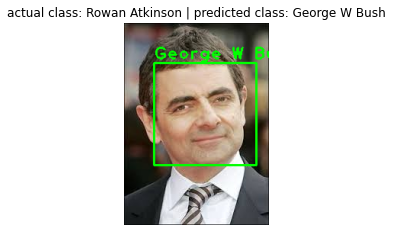

In [31]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[14]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/15/Ed_Sheeran_100.jpg")

In [33]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

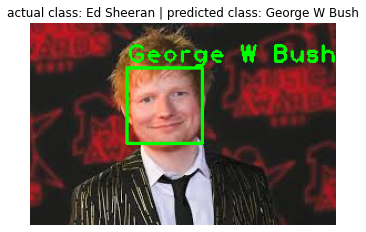

In [34]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[15]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/16/Ariana_Grande_100.jpg")

In [36]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

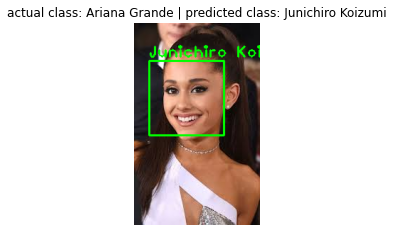

In [37]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[16]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/17/Doja_Cat_100.jpg")

In [39]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

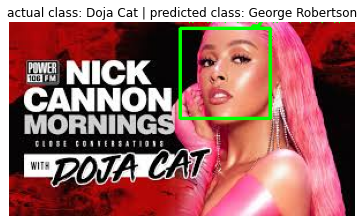

In [40]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[17]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/18/Jay_Chou_100.jpg")

In [42]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

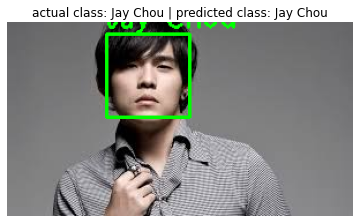

In [43]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[18]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
# Test images
# Will first read a test image.
test_image = cv2.imread("dataset/test-data/19/Michael_Phelps_100.jpg")

In [45]:
# call the predict function to predict the label of the test image
predicted_image, label = predict(test_image)

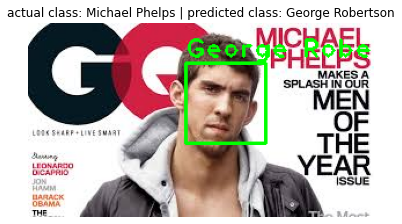

In [46]:
# show the test image and its predicted label
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[19]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()